In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/simarmalhan/Downloads/student-mat.csv')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### EDA

Text(0.5, 1.0, 'Grade distribution')

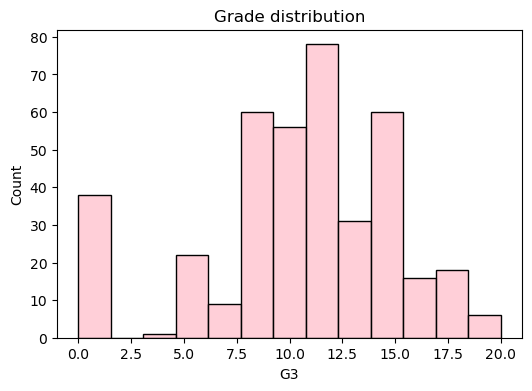

In [8]:
plt.figure(figsize = (6, 4))
sns.histplot(df['G3'], color = 'pink')
plt.title('Grade distribution')

#### Effect of school and reason for selecting school

Text(0.5, 1.0, 'Reason for selecting school')

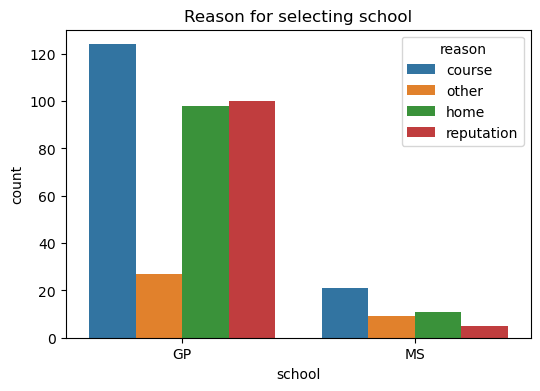

In [9]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'school', hue = 'reason', data = df)
plt.title('Reason for selecting school')

Observation: School selection is mostly based on 'course preference.'

Text(0.5, 1.0, 'Reason of selecting school vs Grade')

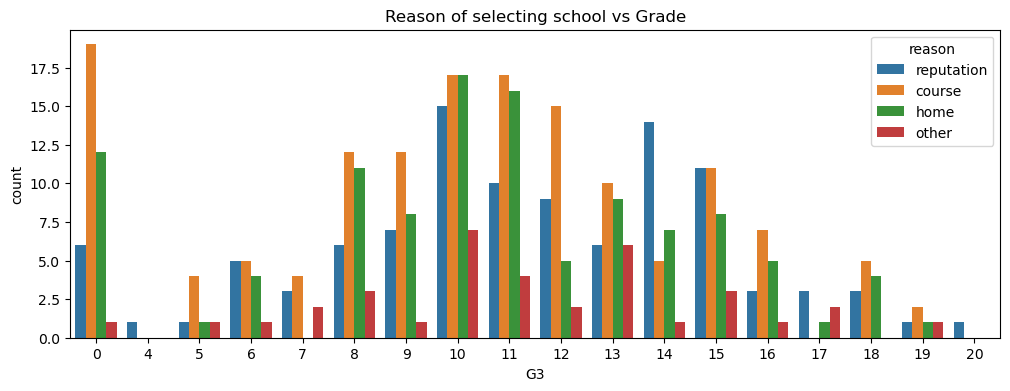

In [13]:
plt.figure(figsize = (12, 4))
sns.countplot(data = df, x = 'G3', hue = 'reason')
plt.title('Reason of selecting school vs Grade')

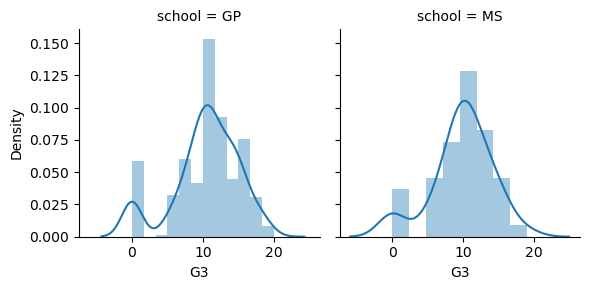

In [15]:
g = sns.FacetGrid(df, col = 'school')
g.map(sns.distplot, 'G3')

School, visually, seems to have no effect on grades.

#### Effect of internet

In [16]:
df['internet'].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

Text(0.5, 0.98, 'Internet Availability vs Grade')

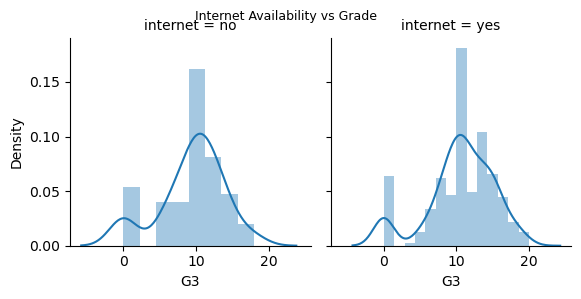

In [19]:
g = sns.FacetGrid(df, col = 'internet')
g = g.map(sns.distplot, 'G3')

g.fig.suptitle('Internet Availability vs Grade', fontsize = 9)

Internet seems to have no effect on grades either.

#### Effect of attendance

In [21]:
df['absences'].value_counts()

absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64

In [23]:
bins = [0, 1, 5, 10, 15, 20, 40, 60, float('inf')]
labels = ['0-1', '1-5', '5-10', '10-15', '15-20', '20-40', '40-60', '60+']

df['absences_binned'] = pd.cut(df['absences'], bins = bins, labels = labels)

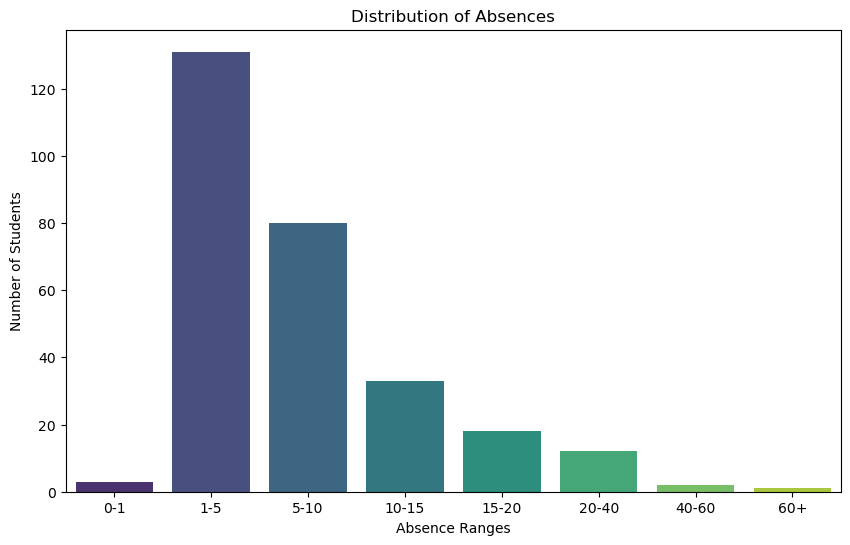

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='absences_binned', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Absence Ranges')
plt.ylabel('Number of Students')
plt.title('Distribution of Absences')
plt.show()

Text(0.5, 1.0, 'Effect of Absences on Grades')

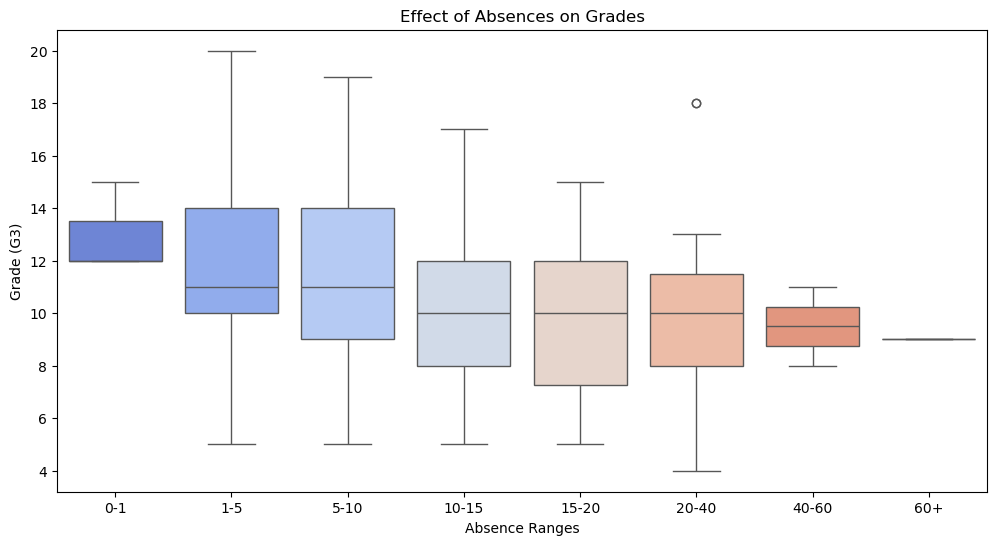

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'absences_binned', y = 'G3', data = df, palette = 'coolwarm')

plt.xlabel('Absence Ranges')
plt.ylabel('Grade (G3)')
plt.title('Effect of Absences on Grades')

#### Effect of Extra Classes on Grades

Text(0.5, 0.98, 'Grades vs Extra Classes')

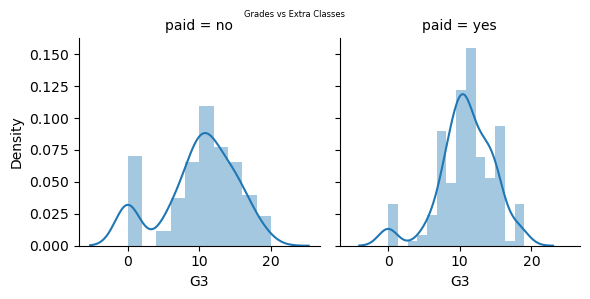

In [30]:
g = sns.FacetGrid( df, col = 'paid')
g = g.map(sns.distplot, 'G3')

g.fig.suptitle('Grades vs Extra Classes', fontsize = 6)

Extra classes are helping

#### Effect of Alcohol Consumption

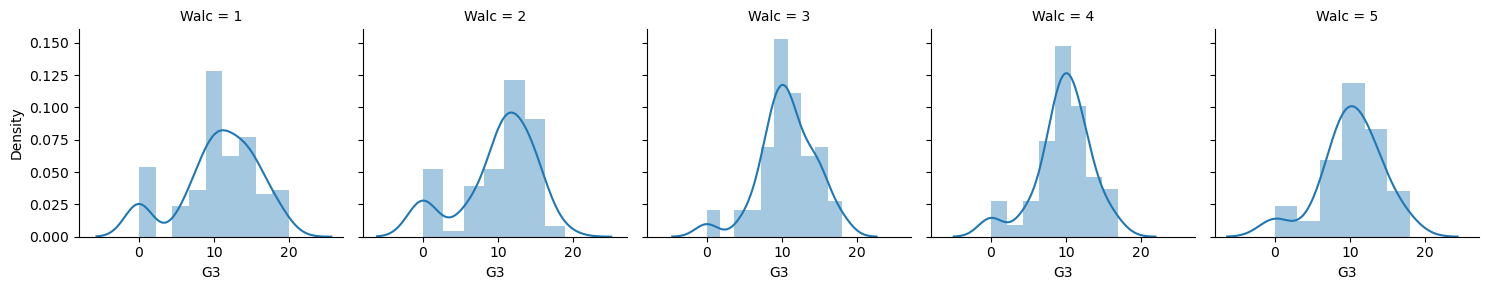

In [31]:
g = sns.FacetGrid(df, col ='Walc')
g = g.map(sns.distplot, 'G3').add_legend()

Consumption of alcohol sseems to not effect students' performance, as the distribution remains the same for any alcohol amount.

#### Converting categorical columns into numerical

In [34]:
binary_encoder = lambda x: 1 if x == 'yes' else 0

df.schoolsup = df.schoolsup.apply(binary_encoder)
df.famsup = df.famsup.apply(binary_encoder)
df.paid = df.paid.apply(binary_encoder)
df.activities = df.activities.apply(binary_encoder)
df.nursery = df.nursery.apply(binary_encoder)
df.higher = df.higher.apply(binary_encoder)
df.internet = df.internet.apply(binary_encoder)
df.romantic = df.romantic.apply(binary_encoder)

sex_encoder = lambda x: 1 if x == 'M' else (0 if x == 'F' else x)
df.sex = df.sex.apply(sex_encoder)

address_encoder = lambda x: 1 if x == 'U' else (0 if x == 'R' else x)
df.address = df.address.apply(address_encoder)

famsize_encoder = lambda x: 1 if x == 'GT3' else (0 if x == 'LE3' else x)
df.famsize = df.famsize.apply(famsize_encoder)

pstatus_encoder = lambda x: 1 if x == 'T' else (0 if x == 'A' else x)
df.Pstatus = df.Pstatus.apply(pstatus_encoder)

school_encoder = lambda x: 1 if x == 'GP' else (0 if x == 'MS' else x)
df.school = df.school.apply(school_encoder)

def job_encoder(val):
    if val == 'teacher':
        val = 0
    elif val == 'health':
        val = 1
    elif val == 'services':
        val = 2
    elif val == 'at_home':
        val = 3
    elif val == 'other':
        val = 4
    else:
        val = val
    return val

            
df.Mjob = df.Mjob.apply(job_encoder)
df.Fjob = df.Fjob.apply(job_encoder)

def reason_encoder(val):
    if val == 'course':
        val = 0
    elif val == 'home':
        val = 1
    elif val == 'reputation':
        val = 2
    elif val == 'other':
        val = 3
    else:
        val = val
    return val

df.reason = df.reason.apply(reason_encoder)

def gaurdian_encoder(val):
    if val == 'mother':
        val = 0
    elif val == 'father':
        val = 1
    elif val == 'other':
        val = 2
    else:
        val = val
    return val

df.guardian = df.guardian.apply(gaurdian_encoder)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   school           395 non-null    int64   
 1   sex              395 non-null    int64   
 2   age              395 non-null    int64   
 3   address          395 non-null    int64   
 4   famsize          395 non-null    int64   
 5   Pstatus          395 non-null    int64   
 6   Medu             395 non-null    int64   
 7   Fedu             395 non-null    int64   
 8   Mjob             395 non-null    int64   
 9   Fjob             395 non-null    int64   
 10  reason           395 non-null    int64   
 11  guardian         395 non-null    int64   
 12  traveltime       395 non-null    int64   
 13  studytime        395 non-null    int64   
 14  failures         395 non-null    int64   
 15  schoolsup        395 non-null    int64   
 16  famsup           395 non-null    int64   
 1

In [41]:
df = df.drop('absences_binned', axis=1)

<Axes: >

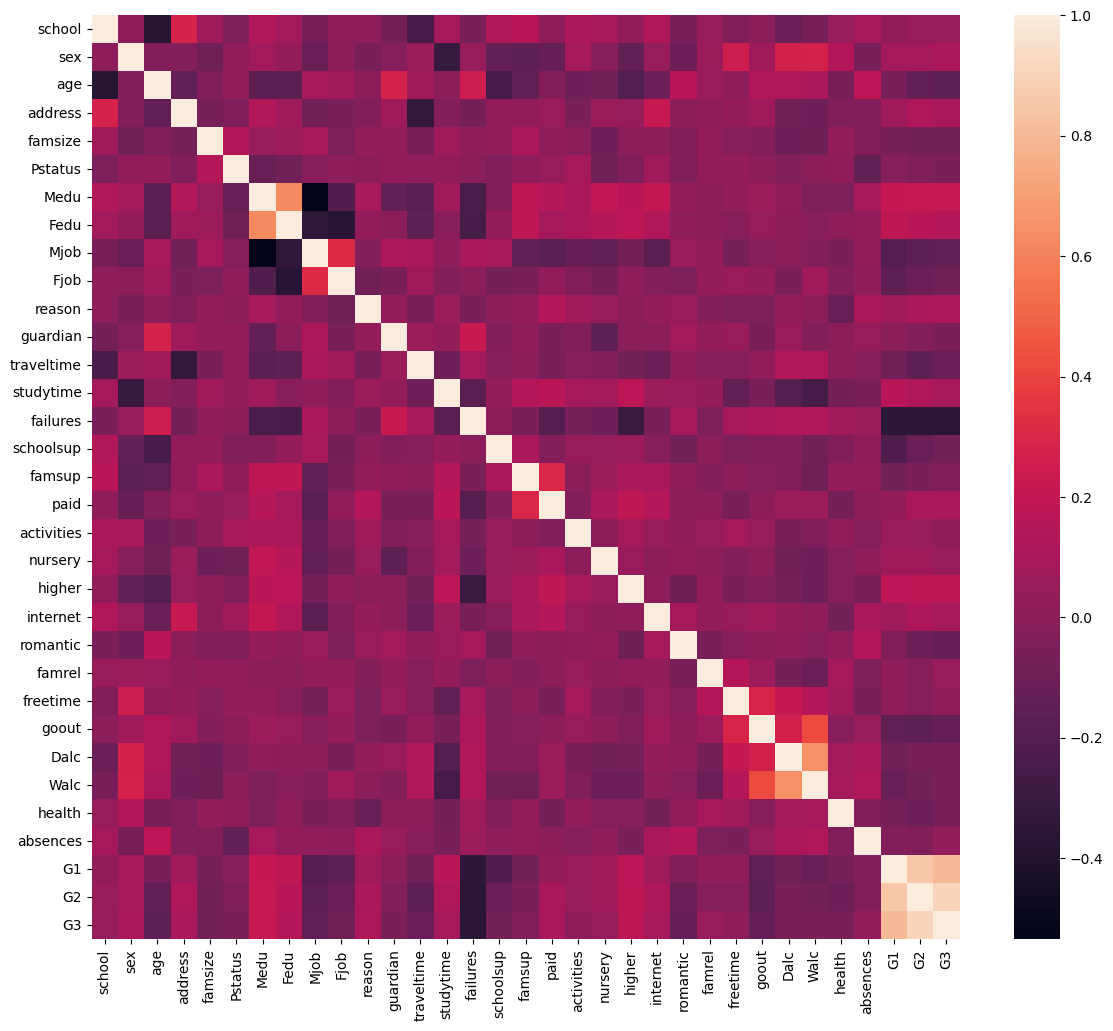

In [42]:
corr = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr)

In [44]:
y = df['G3']
X = df.drop('G3', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Using Standard Scaler to Normalize Features

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training a Logistic Regression Model and Evaluating Results

In [49]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.24369747899159663
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           5       0.00      0.00      0.00         6
           6       0.50      0.14      0.22         7
           7       0.00      0.00      0.00         3
           8       0.31      0.33      0.32        12
           9       0.25      0.12      0.17         8
          10       0.26      0.41      0.32        17
          11       0.06      0.14      0.08         7
          12       0.25      0.12      0.17         8
          13       0.17      0.14      0.15         7
          14       0.36      0.44      0.40         9
          15       0.29      0.36      0.32        11
          16       0.33      0.40      0.36         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3

    accuracy                           0.24       

#### Training Linear Regression Model and Evaluating Results

In [50]:
lr = LinearRegression()
lasso = Lasso()

# Fitting the linear regression model
lr.fit(X_train_scaled, y_train)

# Fitting the lasso regression model
lasso.fit(X_train_scaled, y_train)

# Predictions using linear regression
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Predictions using lasso regression
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression evaluation
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Lasso Regression evaluation
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("Linear Regression MSE (train):", mse_train_lr)
print("Linear Regression MSE (test):", mse_test_lr)
print("Linear Regression R2 (train):", r2_train_lr)
print("Linear Regression R2 (test):", r2_test_lr)

print("Lasso Regression MSE (train):", mse_train_lasso)
print("Lasso Regression MSE (test):", mse_test_lasso)
print("Lasso Regression R2 (train):", r2_train_lasso)
print("Lasso Regression R2 (test):", r2_test_lasso)

Linear Regression MSE (train): 2.8233848779084543
Linear Regression MSE (test): 4.670553172762854
Linear Regression R2 (train): 0.8621393678420172
Linear Regression R2 (test): 0.787528900955081
Lasso Regression MSE (train): 4.541074137692794
Lasso Regression MSE (test): 5.312718703218982
Lasso Regression R2 (train): 0.77826779614887
Lasso Regression R2 (test): 0.7583157411905246


#### AdaBoostRegressor

In [52]:
base_regressor = DecisionTreeRegressor(max_depth=3)

adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)

adaboost_regressor.fit(X_train, y_train)

y_pred = adaboost_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.2784318537719717
R^2 Score: 0.8508587755349872


We get the best results using AdaBoost Regressor